In [2]:
!pip install tensorflow

In [1]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
X, y = make_circles(n_samples=1000, noise=0.03, factor=0.5, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
def plot_decision_boundary(model, x, y):
    x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
    y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    grid = np.c_[xx.ravel(), yy.ravel()]
    pred_func = model.predict(grid)
    pred_func = np.round(pred_func).reshape(xx.shape)
    plt.contourf(xx, yy, pred_func, alpha=0.8, cmap='viridis')
    plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap='viridis')  # <== changed X to x
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

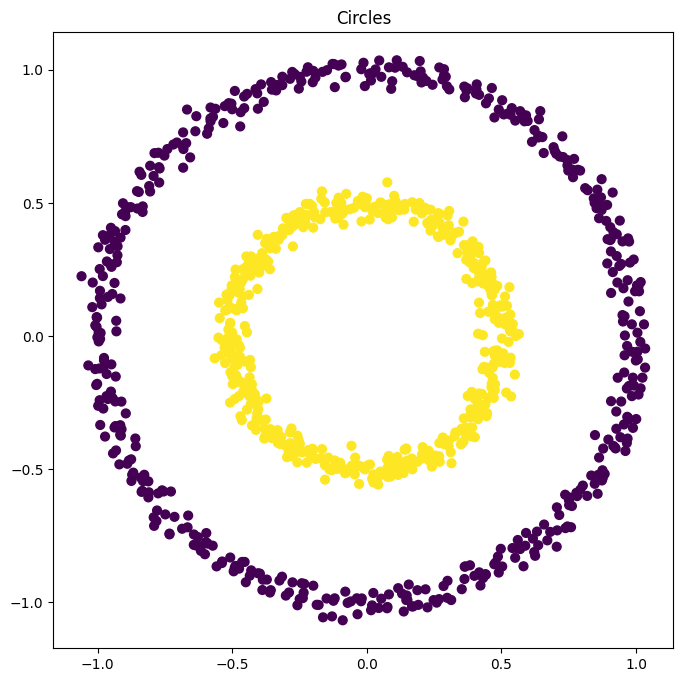

In [13]:
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='viridis')
plt.title("Circles")
plt.show()

In [14]:
 X_train.shape

(800, 2)

In [15]:
base_model_circles = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')

])

base_model_circles.compile(optimizer='adam',
                           loss='binary_crossentropy',
                           metrics=['accuracy'])

base_model_circles_loss = base_model_circles.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

loss, accuracy = base_model_circles.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.2f}")

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.5015 - loss: 0.6731 - val_accuracy: 0.5100 - val_loss: 0.6694
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5188 - loss: 0.6613 - val_accuracy: 0.5450 - val_loss: 0.6585
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5724 - loss: 0.6470 - val_accuracy: 0.5800 - val_loss: 0.6466
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6020 - loss: 0.6379 - val_accuracy: 0.6350 - val_loss: 0.6324
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7253 - loss: 0.6216 - val_accuracy: 0.8100 - val_loss: 0.6103
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8828 - loss: 0.5935 - val_accuracy: 0.8450 - val_loss: 0.5927
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9058 - loss: 0.5787 - val_accuracy: 0.9450 - val_loss: 0.5738
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9770 - loss: 0.5559 - val_accuracy: 0.9600 - val_loss: 0.5530
Ep

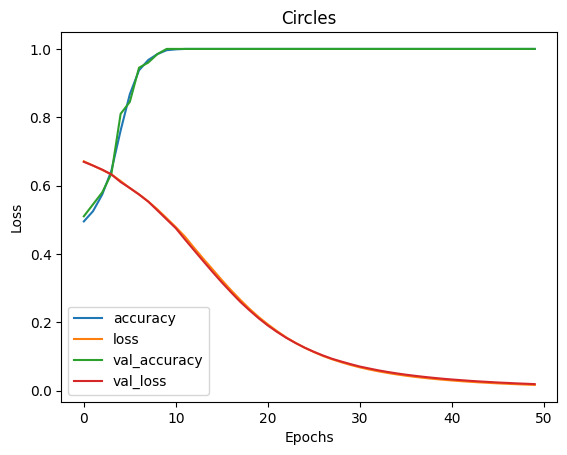

In [16]:
pd.DataFrame(base_model_circles_loss.history).plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Circles")
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


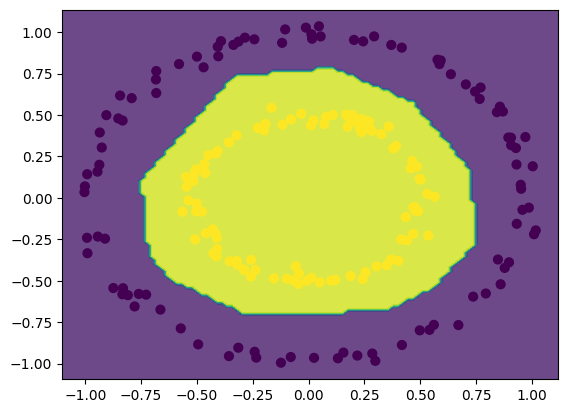

In [17]:
plot_decision_boundary(base_model_circles, X_test, y_test)